##**Restaurant Review Classification with NLTK.ipynb**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
data = pd.read_csv("Restaurant_Reviews.tsv", sep='\t', quoting=3)

In [5]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


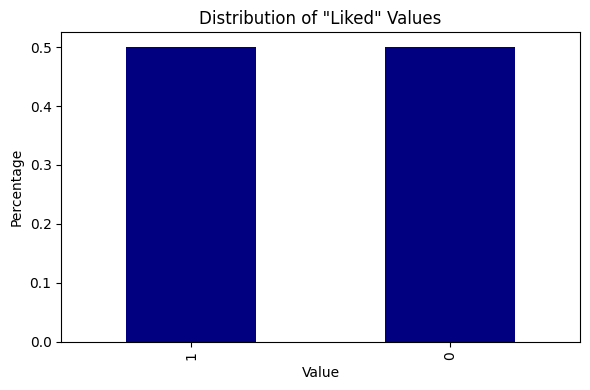

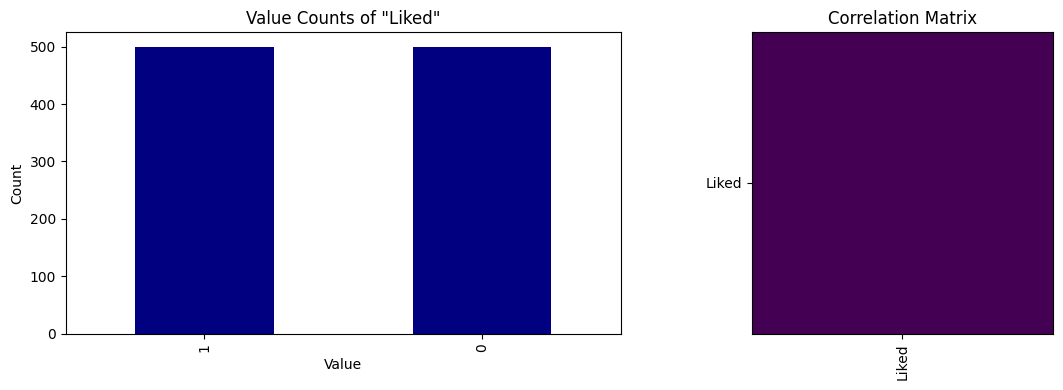

In [11]:
# Plot the value counts with percentages
fig, ax = plt.subplots(figsize=(6, 4))
data['Liked'].value_counts(normalize=True).plot.bar(color='navy', ax=ax)
ax.set_title('Distribution of "Liked" Values')
ax.set_xlabel('Value')
ax.set_ylabel('Percentage')
plt.tight_layout()
plt.show()

# Create a subplot with multiple plots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot 1: Value counts
data['Liked'].value_counts().plot.bar(ax=axs[0], color='navy')
axs[0].set_title('Value Counts of "Liked"')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Count')

# Plot 2: Correlation matrix
numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()
axs[1].imshow(corr_matrix, cmap='viridis')
axs[1].set_title('Correlation Matrix')
axs[1].set_xticks(range(len(numeric_data.columns)))
axs[1].set_yticks(range(len(numeric_data.columns)))
axs[1].set_xticklabels(numeric_data.columns, rotation=90)
axs[1].set_yticklabels(numeric_data.columns)

plt.tight_layout()
plt.show()

### **Cleaning Text Data**


Imports and Downloads

In [19]:
# Importing necessary libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Downloading stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')

# Initializing Porter Stemmer
ps = PorterStemmer()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Define the Cleaning Function

In [20]:
# Function for cleaning text
def clean_text(text):
    # Removing non-alphabetic characters
    text = re.sub('[^a-zA-Z]', ' ', text)
    # Converting to lowercase
    text = text.lower()
    # Tokenizing the text
    tokens = word_tokenize(text)
    # Removing stopwords and applying stemming
    words = [ps.stem(word) for word in tokens if word not in set(stopwords.words('english'))]
    # Joining the cleaned words
    return ' '.join(words)


Process Data

In [22]:
corpus = []
for i in range(len(data['Review'])):
    cleaned_review = clean_text(data['Review'][i])
    corpus.append(cleaned_review)

# Print first few entries of corpus to verify
print(corpus[:5])


['wow love place', 'crust good', 'tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price']


### **Create Bag-of-Words Model** - Feature Engineering

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
cv = CountVectorizer(max_features=1500)

# Fit and transform the corpus to create the Bag-of-Words model
X = cv.fit_transform(corpus).toarray()

# maing the dependent variable column
y = data.iloc[:, 1].values
# Print the shape of X to verify
print("Shape of X (features):", X.shape)
print(y[:10])


Shape of X (features): (1000, 1500)
[1 0 0 1 1 0 0 0 1 1]


To effectively analyze text data, the process starts with importing necessary libraries such as re for regex operations, nltk for text processing, and sklearn for machine learning tasks. Next, the text undergoes preprocessing: removing non-alphabetic characters, converting to lowercase, tokenizing into words, and removing stopwords to refine the dataset (corpus). Using CountVectorizer, the text is transformed into a numerical matrix (X), where each row represents a document and each column represents the frequency of words in that document. By adjusting max_features, the vocabulary size is controlled, resulting in a feature matrix with dimensions Shape of X (features): (1000, 1500). This transformation prepares the data for further analysis, ensuring it is structured and ready for tasks like classification or sentiment analysis. This systematic approach provides a foundational understanding of text preprocessing and feature extraction in NLP applications.

### **Implementing the Naive Bayes algorithm**

In [25]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes to verify
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (800, 1500)
Shape of X_test: (200, 1500)
Shape of y_train: (800,)
Shape of y_test: (200,)


Training the Naive Bayes Model

In [26]:
# Initialize Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier on the training data
nb_classifier.fit(X_train, y_train)

print("Naive Bayes model trained successfully!")


Naive Bayes model trained successfully!


Evaluating the Model

In [27]:
# Predicting on the test data
y_pred = nb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate and print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.745
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.75      0.74        96
           1       0.76      0.74      0.75       104

    accuracy                           0.74       200
   macro avg       0.74      0.75      0.74       200
weighted avg       0.75      0.74      0.75       200

Confusion Matrix:
[[72 24]
 [27 77]]


Based on the evaluation results of the Naive Bayes model, it achieved an accuracy of 0.745, indicating that it correctly predicts the sentiment of restaurant reviews approximately 74.5% of the time on unseen data. The classification report provides detailed metrics such as precision, recall, and F1-score for both positive and negative sentiment classes. Specifically, for negative sentiment (class 0), the model achieved a precision of 0.73 and a recall of 0.75, while for positive sentiment (class 1), it achieved a precision of 0.76 and a recall of 0.74. The F1-score, which balances precision and recall, is around 0.74 for both classes, suggesting a balanced performance.

### Examining the confusion matrix reveals:

True negatives (TN): 72
False positives (FP): 24
False negatives (FN): 27
True positives (TP): 77
This breakdown illustrates how well the model distinguishes between positive and negative reviews. Overall, the model demonstrates balanced precision and recall scores across classes, indicating its effectiveness in sentiment classification.

### Choice of Multinomial Naive Bayes (MNB):
Multinomial Naive Bayes was chosen for this text classification task primarily due to the nature of the data and the characteristics of the features used. Text data, represented as word counts or frequencies (Bag-of-Words), aligns well with MNB's assumption of features following a multinomial distribution. This makes MNB suitable for handling discrete feature counts commonly found in text classification tasks. In contrast, Gaussian Naive Bayes assumes features follow a Gaussian (normal) distribution, which is less appropriate for discrete text features. Bernoulli Naive Bayes, on the other hand, assumes binary features (like word presence/absence), which may not fully capture the frequency information provided by the Bag-of-Words approach used here.